In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import time

import mindspore.dataset as ds
from mindspore import nn
import mindspore.ops as ops
import mindspore.numpy as mnp
from mindspore import Tensor

In [2]:
# read stacks data
data = pd.read_csv('data_stocks.csv')
data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [4]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [5]:
print('begin', time.strftime('%Y-%m-%d', time.localtime(data['DATE'].min())))
print('end', time.strftime('%Y-%m-%d', time.localtime(data['DATE'].max())))

begin 2017-04-03
end 2017-09-01


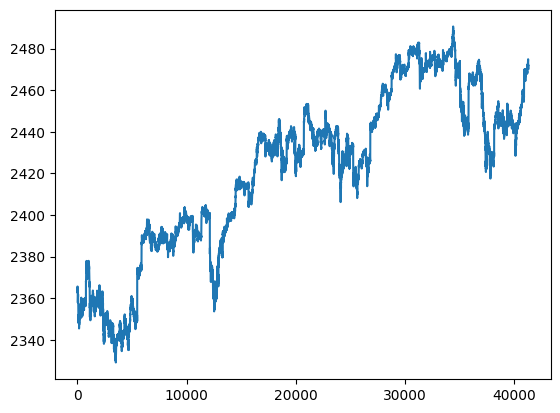

In [6]:
plt.plot(data['SP500'])

In [7]:
# train : test = 0.8 : 0.2
data.drop('DATE', axis=1, inplace=True)
data_train = data.iloc[:int(data.shape[0] * 0.8), :]
data_test = data.iloc[int(data.shape[0] * 0.8):, :]
print('training data shape:', data_train.shape)
print('test data shape', data_test.shape)

training data shape: (33012, 501)
test data shape (8254, 501)


In [8]:
# scale data into the range for -1 to 1
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [9]:
print(
'''
同步预测
同步预测是指，使用当前时刻的500支个股股价，预测当前时刻的大盘指数，即一个回归问题，输入共500维特征，输出一维，即[None, 500] => [None, 1]
使用TensorFlow实现同步预测，主要用到多层感知机（Multi-Layer Perceptron，MLP）
损失函数用均方误差（Mean Square Error，MSE）
MSE的值越小，说明预测模型描述实验数据具有更好的精确度。
'''
)


同步预测
同步预测是指，使用当前时刻的500支个股股价，预测当前时刻的大盘指数，即一个回归问题，输入共500维特征，输出一维，即[None, 500] => [None, 1]
使用TensorFlow实现同步预测，主要用到多层感知机（Multi-Layer Perceptron，MLP）
损失函数用均方误差（Mean Square Error，MSE）
MSE的值越小，说明预测模型描述实验数据具有更好的精确度。



In [9]:
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]
# X_train = X_train.astype(np.float32)
# y_train = y_train.astype(np.float32)
# X_test = X_test.astype(np.float32)
# y_test = y_test.astype(np.float32)
print(X_train)
print(X_train.shape)
print(X_test.shape)
# seq_len = 5
# X_train = np.array([data_train[i : i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)]).squeeze()
# y_train = np.array([data_train[i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)])
# X_test = np.array([data_test[i : i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)]).squeeze()
# y_test = np.array([data_test[i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])

[[-0.78013925 -0.6376737  -0.87437867 ... -0.89728097 -0.24863686
  -0.81802426]
 [-0.77574203 -0.63561503 -0.81201988 ... -0.91540785 -0.27371865
  -0.81802426]
 [-0.78307072 -0.63663407 -0.82060551 ... -0.91389728 -0.28135224
  -0.81542461]
 ...
 [ 0.42323195  0.83780751  0.65838229 ...  0.99244713 -0.6991494
   0.60051993]
 [ 0.42030048  0.82296449  0.65928604 ...  0.98942598 -0.69465649
   0.59792028]
 [ 0.42030048  0.81574884  0.65295978 ...  0.98716012 -0.70338059
   0.60138648]]
(33012, 500)
(8254, 500)


In [10]:
import mindspore  
from mindspore import nn, context ,Model
# 定义模型  
class MLP(nn.Cell):  
    def __init__(self, input_size):  
        super(MLP, self).__init__() 
        self.flatten = nn.Flatten()
        self.fc1 = nn.Dense(input_size, 1024, has_bias=False)  
        self.relu1 = nn.ReLU()  
        self.fc2 = nn.Dense(1024, 512, has_bias=True)  
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Dense(512, 256, has_bias=True)  
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Dense(256, 128, has_bias=True)  
        self.relu4 = nn.ReLU() 
        self.fc5 = nn.Dense(128, 1, has_bias=True)
    def construct(self, x):
        x = self.flatten(x)
        x = self.fc1(x)  
        x = self.relu1(x)  
        x = self.fc2(x)  
        x = self.relu2(x)
        x = self.fc3(x)  
        x = self.relu3(x)
        x = self.fc4(x)  
        x = self.relu4(x)
        x = self.fc5(x)  
        return x  

# # 准备数据集  
# dataset = ... # 数据集加载器  
# input_data = mindspore.Tensor(...) # 输入数据  
# output_data = mindspore.Tensor(...) # 输出数据  
  

In [12]:
print(X_train.shape)
print(X_train.shape[1:])
mlp = MLP(input_size = X_train.shape[1:][0])  
# *X_train.shape[1:][1]

(33012, 500)
(500,)


In [13]:
# Iterable object as input source
class Iterable():
    def __init__(self, X, y):
        self._data = X
        self._label = y

    def __getitem__(self, index):
        return self._data[index], self._label[index]

    def __len__(self):
        return len(self._data)
data = Iterable(X_train, y_train)
data2 = Iterable(X_test, y_test)

dataset = ds.GeneratorDataset(source=data, column_names=["data", "label"])
test_dataset = ds.GeneratorDataset(source=data2, column_names=["data", "label"])



#list, dict, tuple are also iterable object.
# dataset = GeneratorDataset(source=[], column_names=["col"])

Train on 33012 samples
Epoch 1/5
32768/33012 [============================>.] - ETA: 0s - loss: 0.0141

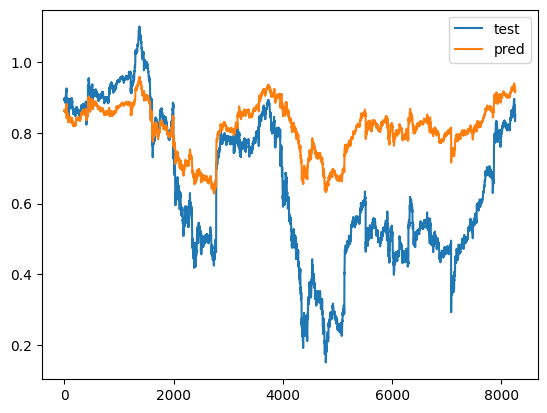

33012/33012 [==============================] - 26s 802us/sample - loss: 0.0140
Epoch 2/5
32768/33012 [============================>.] - ETA: 0s - loss: 3.7685e-04

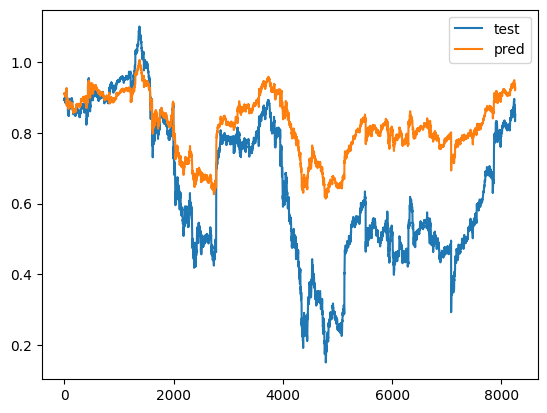

33012/33012 [==============================] - 33s 985us/sample - loss: 3.7625e-04
Epoch 3/5
32768/33012 [============================>.] - ETA: 0s - loss: 1.5753e-04

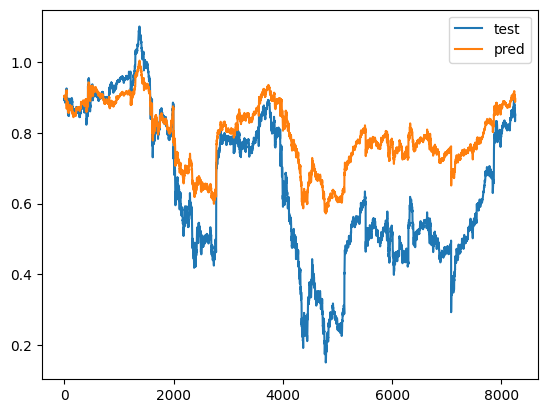

33012/33012 [==============================] - 31s 952us/sample - loss: 1.5714e-04
Epoch 4/5
32768/33012 [============================>.] - ETA: 0s - loss: 2.1423e-04

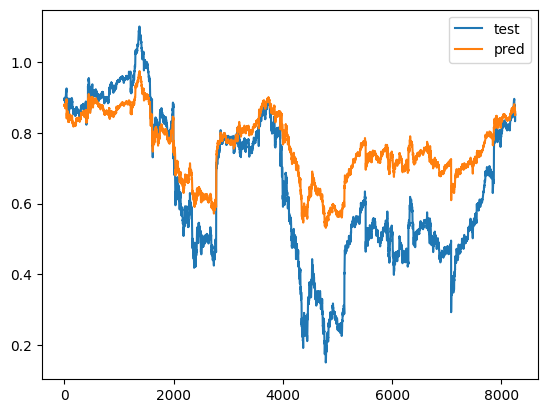

33012/33012 [==============================] - 23s 697us/sample - loss: 2.1415e-04
Epoch 5/5
32768/33012 [============================>.] - ETA: 0s - loss: 1.6787e-04

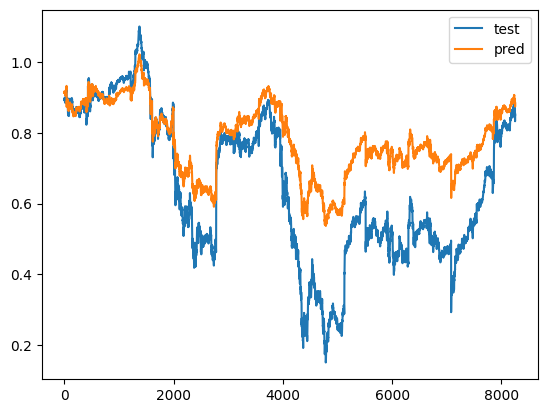

33012/33012 [==============================] - 23s 709us/sample - loss: 1.6740e-04


In [15]:
import mindspore
from mindspore import nn
from mindspore.dataset import vision, transforms
from mindspore.dataset import MnistDataset
from mindspore.train import Model, CheckpointConfig, ModelCheckpoint, LossMonitor
epoch_size = 5
context.set_context(mode=context.GRAPH_MODE, device_target="CPU")  
loss = nn.MSELoss()  
optimizer = nn.Adam(params=mlp.trainable_params())  
# model1.compile(loss=loss, optimizer=optimizer)
model1 = Model(mlp,loss,optimizer, metrics={'accuracy'})

steps_per_epoch = dataset.get_dataset_size()
config = CheckpointConfig(save_checkpoint_steps=steps_per_epoch)

ckpt_callback = ModelCheckpoint(prefix="mnist", directory="./checkpoint", config=config)
loss_callback = LossMonitor(steps_per_epoch)
# trainer = Model(model1, loss_fn=loss, optimizer=optimizer, metrics={'accuracy'})
model.fit(X_train, y_train,epochs=5,batch_size=256,shuffle=True,callbacks=[LambdaCallback(on_epoch_end=on_epoch_end)])
# ds_train = ds.GeneratorDataset(X_train, y_train, 32)     
# model1.train(epoch_size,dataset) 
# , callbacks=[ckpoint_cb, LossMonitor(125)

In [11]:
print(
'''
异步预测是指，使用历史若干个时刻的大盘指数，预测当前时刻的大盘指数，这样才更加符合预测的定义

例如，使用前五个大盘指数，预测当前的大盘指数，每组输入包括5个step，每个step对应一个历史时刻的大盘指数，输出一维，即[None, 5, 1] => [None, 1]

使用Keras实现异步预测，主要用到循环神经网络即RNN（Recurrent Neural Network）中的LSTM（Long Short-Term Memory）
'''
)


异步预测是指，使用历史若干个时刻的大盘指数，预测当前时刻的大盘指数，这样才更加符合预测的定义

例如，使用前五个大盘指数，预测当前的大盘指数，每组输入包括5个step，每个step对应一个历史时刻的大盘指数，输出一维，即[None, 5, 1] => [None, 1]

使用Keras实现异步预测，主要用到循环神经网络即RNN（Recurrent Neural Network）中的LSTM（Long Short-Term Memory）



In [12]:
seq_len = 5
X_train = np.array([data_train[i : i + seq_len, 1:] for i in range(data_train.shape[0] - seq_len)])#[:, :, np.newaxis]
y_train = np.array([data_train[i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)])
X_test = np.array([data_test[i : i + seq_len, 1:] for i in range(data_test.shape[0] - seq_len)]) #[:, :, np.newaxis]
y_test = np.array([data_test[i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])
# X_train = list(X_train)
# y_train = list(y_train)
# X_test = list(X_test)
# y_test = list(y_test)

In [13]:
import mindspore  
from mindspore import nn, context  
  
# 定义模型  
class LSTM(nn.Cell):  
    def __init__(self, input_size):  
        super(LSTM, self).__init__()  
        self.lstm = nn.LSTM(input_size,128, has_bias=True)  
        self.fc = nn.Dense(128, 1, has_bias=True)  
  
    def construct(self, x):  
        output, _ = self.lstm(x)  
        output = self.fc(output)  
        return output  


In [14]:
# print(X_train.shape)
# print(X_train.shape[1:])
print(X_train.shape[1:][0]*X_train.shape[1:][1])
lstm_model = LSTM(input_size = X_train.shape[1:][0])  
# *X_train.shape[1:][1]

2500


In [15]:
# Iterable object as input source
class Iterable():
    def __init__(self, X, y):
        self._data = X
        self._label = y

    def __getitem__(self, index):
        return self._data[index], self._label[index]

    def __len__(self):
        return len(self._data)
data = Iterable(X_train, y_train)
data2 = Iterable(X_test, y_test)

dataset = ds.GeneratorDataset(source=data, column_names=["data", "label"])
test_dataset = ds.GeneratorDataset(source=data2, column_names=["data", "label"])

In [17]:
import mindspore
from mindspore import nn
from mindspore.dataset import vision, transforms
from mindspore.train import Model, CheckpointConfig, ModelCheckpoint, LossMonitor
epoch_size = 10
context.set_context(mode=context.GRAPH_MODE, device_target="CPU")
loss = nn.MSELoss()   
optimizer = nn.Adam(params=lstm_model.trainable_params())  
# model1.compile(loss=loss, optimizer=optimizer)
lstm_model = Model(lstm_model,loss,optimizer, metrics={'accuracy'})

steps_per_epoch = dataset.get_dataset_size()
config = CheckpointConfig(save_checkpoint_steps=steps_per_epoch)

ckpt_callback = ModelCheckpoint(prefix="mnist", directory="./checkpoint", config=config)
loss_callback = LossMonitor(steps_per_epoch)

Train on 33012 samples
Epoch 1/10
32768/33012 [============================>.] - ETA: 0s - loss: 0.0146

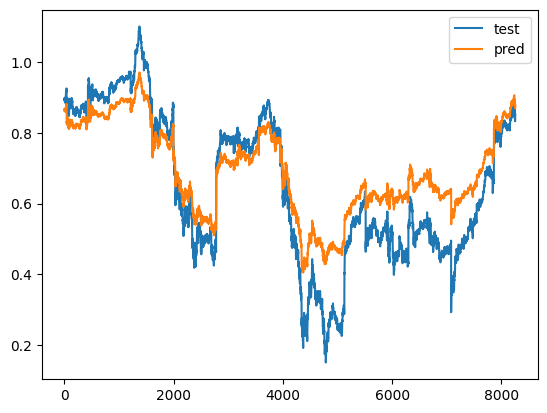

33012/33012 [==============================] - 27s 820us/sample - loss: 0.0145
Epoch 2/10
32768/33012 [============================>.] - ETA: 0s - loss: 3.0977e-04

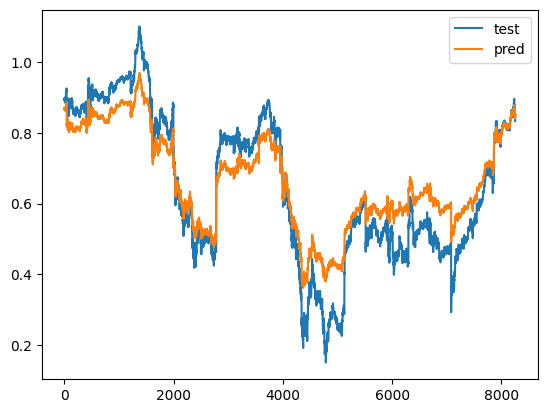

33012/33012 [==============================] - 26s 782us/sample - loss: 3.1324e-04
Epoch 3/10
32768/33012 [============================>.] - ETA: 0s - loss: 1.7741e-04

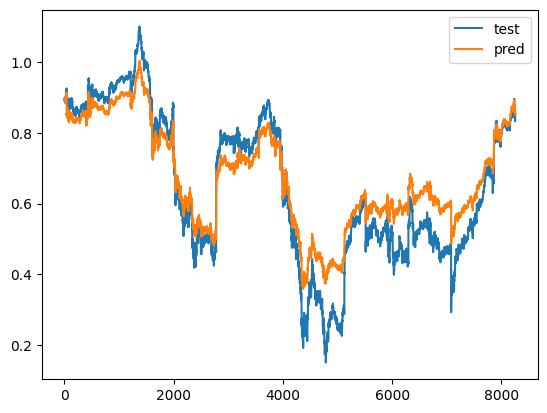

33012/33012 [==============================] - 19s 576us/sample - loss: 1.7705e-04
Epoch 4/10
32768/33012 [============================>.] - ETA: 0s - loss: 1.5434e-04

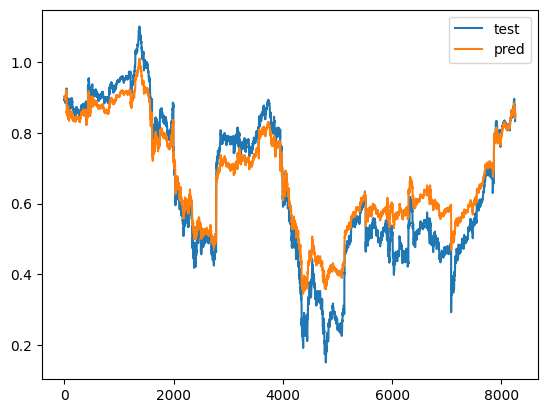

33012/33012 [==============================] - 19s 578us/sample - loss: 1.5373e-04
Epoch 5/10
32768/33012 [============================>.] - ETA: 0s - loss: 8.6032e-05

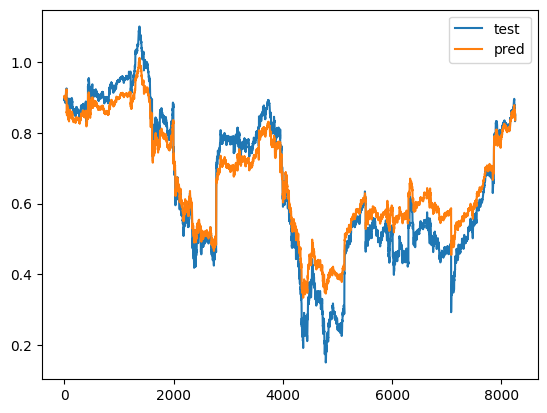

33012/33012 [==============================] - 19s 585us/sample - loss: 8.5910e-05
Epoch 6/10
32768/33012 [============================>.] - ETA: 0s - loss: 1.3974e-04

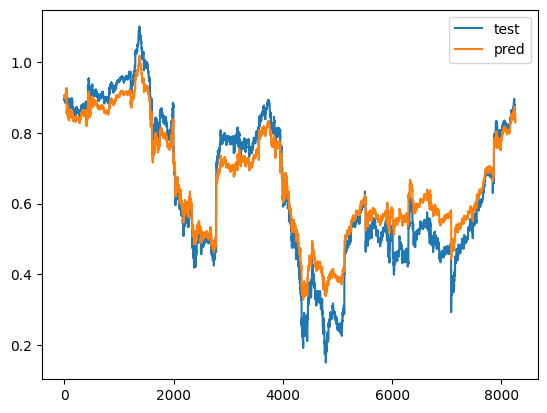

33012/33012 [==============================] - 20s 615us/sample - loss: 1.3950e-04
Epoch 7/10
32768/33012 [============================>.] - ETA: 0s - loss: 1.3207e-04

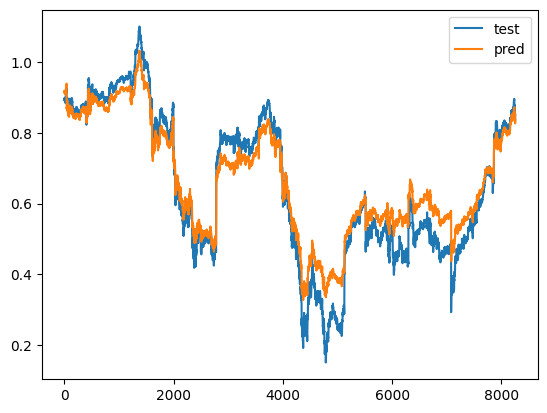

33012/33012 [==============================] - 16s 479us/sample - loss: 1.3176e-04
Epoch 8/10
32768/33012 [============================>.] - ETA: 0s - loss: 8.8376e-05

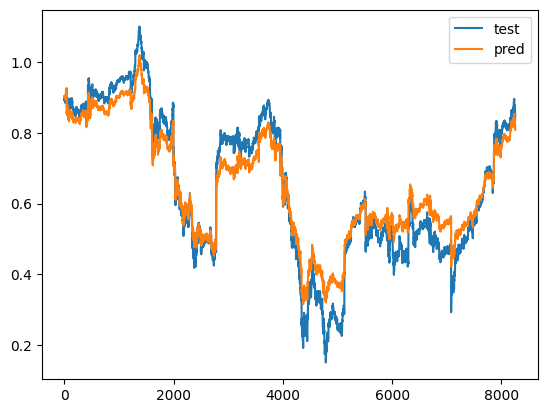

33012/33012 [==============================] - 17s 530us/sample - loss: 8.8836e-05
Epoch 9/10
32768/33012 [============================>.] - ETA: 0s - loss: 1.4690e-04

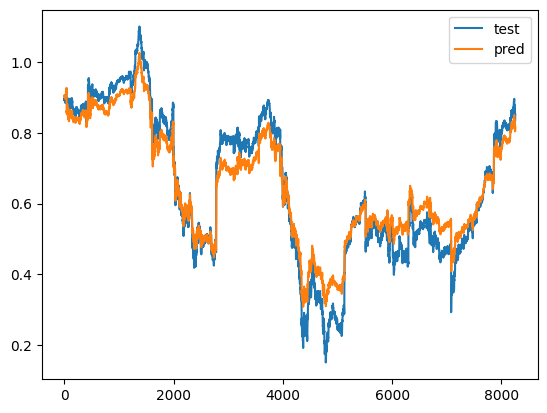

33012/33012 [==============================] - 17s 503us/sample - loss: 1.4636e-04
Epoch 10/10
32768/33012 [============================>.] - ETA: 0s - loss: 9.0894e-05

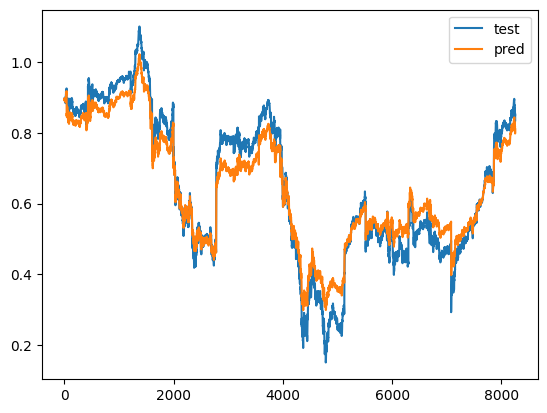

33012/33012 [==============================] - 18s 543us/sample - loss: 9.0999e-05


In [48]:
lstm_mode1.fit(X_train, y_train,epochs=10,batch_size=256,shuffle=True,callbacks=[LambdaCallback(on_epoch_end=on_epoch_end)])